In [211]:
# Wczytywanie danych
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
data1 = pd.read_csv('/content/drive/MyDrive/transaction_dataset.csv')
data1.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [212]:
#Przegląd danych
data1.sample(10)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
6828,6828,3896,0xb6d9a2ccef9cf32cc3f230c45f25a2ca3e1ae7f9,0,228.44,291.57,987662.83,4321,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,Edgeless,Edgeless
2215,2215,2216,0x39de32e81fc02a417220329e58e9cc1dcf4b225a,0,0.00,0.00,15.58,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8303,8303,642,0x47fea7bb88beca144e82ce96a20a25a0974ba6ba,1,69.94,0.00,139.88,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6254,6254,3322,0xa733283520890aea03e24ca638c595c36fa26a09,0,32.85,637.19,336259.72,499,502,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9111,9111,1450,0xa815748bc376d0014797031941ffaa5c61377735,1,0.00,41.15,18663.42,1,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5537,5537,2605,0x93446cdf9314965b5614a01128ce1112c828c87a,0,24.32,0.76,74.48,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2976,2976,44,0x4d5e030765ec28f16145c0000ce3b934c4fe0c0d,0,164.23,0.82,330.08,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2154,2154,2155,0x37e9bdf5f7d6f9de85b9487804c23265a87f759f,0,0.00,2081.99,229018.60,0,110,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,DATAcoin
5984,5984,3052,0xa0111dd9011ab6688481117ed1a14cb1a6d31d45,0,24.77,187.16,342278.58,1487,1632,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,OmiseGO
8744,8744,1083,0x7e160f5cf87e44cbe6b1337bb883f453445391de,1,0.00,29000.07,174000.45,0,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
data1.shape

(9841, 51)

In [214]:
#Pozbywamy się zbędnych kolumn
data1 = data1.iloc[:, 3:]
data1

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
category = data1.select_dtypes('O').columns.astype('category')
data1[category]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [216]:
data1.drop(columns=category, inplace=True)

In [217]:
data1.fillna(data1.median(), inplace=True)
data1.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [218]:
no_var = data1.var() == 0
data1.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [219]:
data1.drop(data1.var()[no_var].index, axis=1, inplace=True)

In [220]:
data1.shape

(9841, 39)

In [221]:
#Usuwanie zmiennych nieistotnych
no_pattern_cols = []
for i in data1.columns[1:]:
    if len(data1[i].value_counts()) < 10:
        print(f'The Column {i}: has this uniques values:\n{data1[i].value_counts()}\n')
        print('-'*40)
        no_pattern_cols.append(i)

The Column min value sent to contract: has this uniques values:
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64

----------------------------------------
The Column max val sent to contract: has this uniques values:
max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column avg value sent to contract: has this uniques values:
avg value sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: count, dtype: int64

----------------------------------------
The Column total ether sent contracts: has this uniques values:
total ether sent contracts
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column  ERC20 uniq sent addr.1: has this uniques values:
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0 

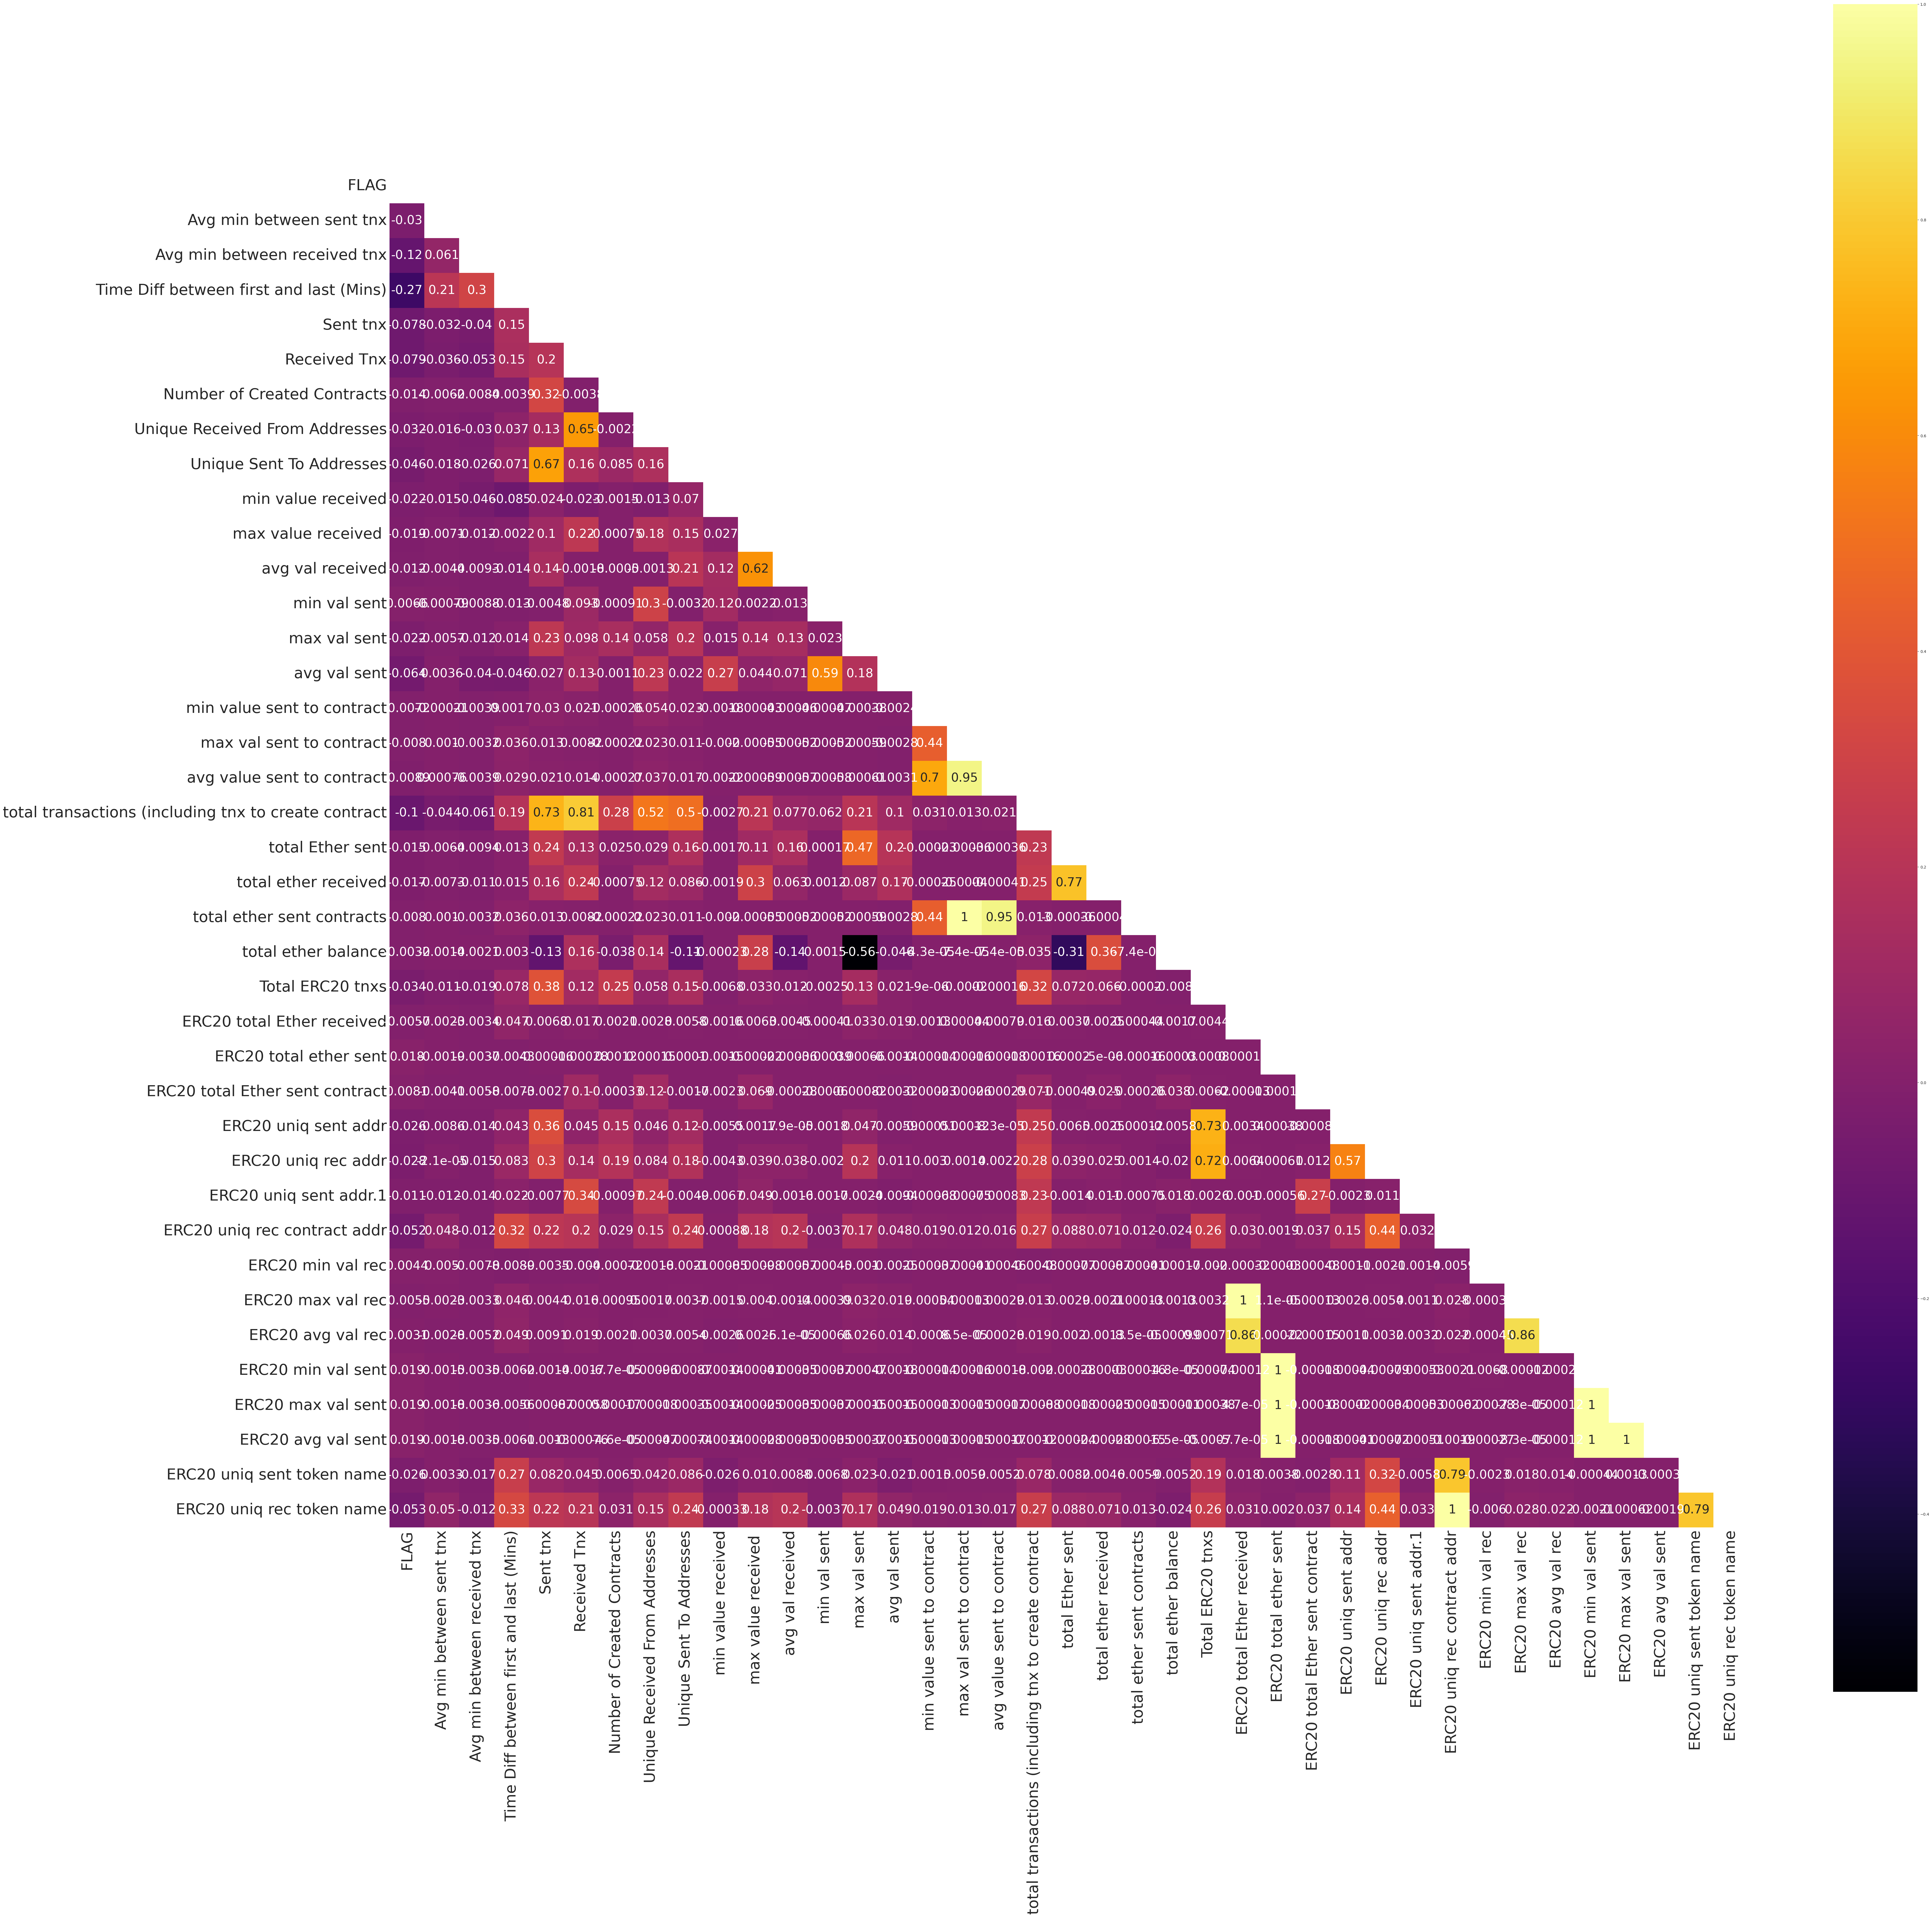

In [222]:
# Macierz korelacji
corr = data1.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(80, 80))
    sns.heatmap(corr, mask=mask, cmap='inferno', annot=True, square=True, annot_kws={'size': 32})
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=40)

plt.show()

In [223]:
# Standaryzacja danych
X = data1.drop('FLAG', axis=1)
y = data1['FLAG']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-0.197465,-0.299436,1.506411,0.799099,-0.079402,-0.02637,0.032280,0.349346,-0.134530,-0.036696,...,-0.050102,3.230390,-0.027525,-0.009888,-0.018129,-0.010665,0.004334,-0.009743,5.844163,3.281981
1,0.354760,-0.218644,3.096367,-0.028965,-0.165500,-0.02637,-0.084931,-0.044882,-0.134530,-0.040016,...,-0.050102,0.146733,-0.027525,-0.011375,-0.019425,-0.010663,-0.010573,-0.010223,-0.041551,0.156028
2,11.221900,-0.241365,0.924051,-0.150467,-0.163375,-0.02637,-0.068187,-0.090370,-0.134183,-0.040128,...,-0.050102,0.207197,-0.027525,-0.011375,-0.019425,-0.010665,-0.010573,-0.010223,-0.196438,0.218547
3,0.238893,0.337091,0.555004,-0.120091,-0.164437,-0.02637,-0.078233,-0.048673,-0.134530,-0.001780,...,-0.050102,0.388588,-0.027525,-0.011374,-0.019417,-0.010566,-0.010565,-0.010216,-0.041551,0.406104
4,-0.235055,0.117108,0.508294,5.919361,-0.152745,-0.01930,-0.078233,-0.025929,-0.134530,-0.039233,...,-0.050102,1.356010,-0.027525,-0.011366,-0.019401,-0.010665,-0.010533,-0.010199,0.732885,1.406409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0.351318,-0.319467,-0.494191,-0.147826,-0.160186,-0.02637,-0.064838,-0.082788,-0.134518,-0.039295,...,-0.050102,-0.155586,-0.027525,-0.011375,-0.019425,-0.010665,-0.010573,-0.010223,-0.196438,-0.156568
9837,-0.236759,-0.346822,-0.676119,-0.153108,-0.174004,-0.02637,-0.101676,-0.097951,-0.134530,-0.040217,...,-0.050102,-0.216050,-0.026698,-0.011375,-0.019425,-0.010665,-0.010573,-0.010223,-0.196438,-0.219087
9838,-0.120427,-0.251968,0.133991,-0.064623,-0.128298,-0.02637,0.002140,0.068838,-0.134527,-0.038579,...,-0.050102,0.025805,-0.027525,-0.011375,-0.019424,-0.010665,-0.010573,-0.010223,-0.196438,0.030990
9839,-0.236759,-0.346822,-0.676119,-0.153108,-0.172941,-0.02637,-0.098327,-0.097951,-0.132996,-0.040179,...,-0.050102,-0.216050,-0.027525,-0.011375,-0.019425,-0.010665,-0.010573,-0.010223,-0.196438,-0.219087


In [224]:
# Poszukiwanie optymalnej liczby komponentów
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_components_optimal = (total_explained_variance >= 0.95).argmax() + 1

n_components_optimal

22

In [231]:
# Wykonanie PCA
pca_optimal = PCA(n_components=n_components_optimal)

X_pca_optimal = pca_optimal.fit_transform(X_scaled)
data1_pca = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(X_pca_optimal.shape[1])])
data1_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,4.439063,0.038652,-0.270561,0.283252,-4.274790,-2.891859,1.679804,0.544062,0.468097,0.325673,...,-0.007557,0.642756,-0.392707,0.553000,0.222915,0.164083,0.520773,-0.217789,-0.551485,-0.714633
1,0.315613,-0.030141,0.016102,0.148564,-0.733672,-0.618213,0.214818,-0.303582,0.867635,0.630979,...,0.041840,0.154997,0.215096,-0.081803,-0.028931,0.414875,0.262410,-1.963411,0.537154,-0.661056
2,-0.016127,-0.040810,0.013105,0.143983,-1.107079,-0.941692,0.686842,-0.193191,1.287267,1.725891,...,1.618168,1.793575,8.997936,-0.684541,0.336753,-0.579719,-0.353279,2.170884,-0.576039,0.359049
3,0.141675,-0.023457,-0.030722,0.048922,-0.476171,-0.316053,0.311067,0.018048,0.167963,0.232628,...,-0.019965,-0.004895,-0.019389,0.052335,0.042419,-0.000205,0.013939,-0.077393,0.131824,0.044970
4,4.047279,0.008927,-0.207616,-0.269121,-0.072717,0.764653,-0.564113,-0.959539,1.341010,-0.849658,...,0.025653,1.044059,-0.463407,0.184178,0.838379,0.273166,0.580319,-0.698215,-0.285798,0.953822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,-0.495860,-0.022919,-0.012003,-0.028165,0.037780,0.164110,-0.029211,-0.064375,-0.140401,-0.061746,...,0.040428,-0.036330,0.510339,0.017527,0.132915,-0.040840,-0.020488,0.246526,-0.065006,0.008636
9837,-0.590818,-0.021986,-0.012690,-0.041551,0.112393,0.272099,-0.081774,-0.080123,-0.252033,-0.178459,...,-0.042450,-0.133262,0.069689,0.058718,0.124651,-0.018704,-0.000694,0.186733,-0.053183,-0.004884
9838,-0.171840,-0.022190,-0.014810,-0.007719,-0.087361,0.014198,-0.003305,-0.127898,0.047925,-0.057984,...,-0.029208,-0.067486,0.055905,-0.001466,0.123309,0.050925,0.022986,-0.171659,0.073524,-0.133613
9839,-0.589611,-0.021980,-0.012658,-0.041717,0.114010,0.271082,-0.082583,-0.079240,-0.251703,-0.178981,...,-0.043272,-0.133431,0.069911,0.058098,0.123423,-0.019104,-0.001934,0.187033,-0.054465,-0.006125


In [226]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(data1_pca, y)

data1_pca_balanced = pd.DataFrame(X_res, columns=data1_pca.columns)
data1_pca_balanced['FLAG'] = y_res

print(data1_pca_balanced['FLAG'].value_counts())

FLAG
0    2179
1    2179
Name: count, dtype: int64


In [227]:
# Przygotowanie danych do modelowania
X = data1_pca_balanced.drop('FLAG', axis=1)
y = data1_pca_balanced['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [228]:
# Model regresji logistycznej
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Accuracy dla modelu Regresji Logistycznej:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Accuracy dla modelu Regresji Logistycznej: 0.6857798165137615
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       660
           1       0.63      0.86      0.73       648

    accuracy                           0.69      1308
   macro avg       0.71      0.69      0.68      1308
weighted avg       0.71      0.69      0.68      1308



In [229]:
#Model random forrest
model = RandomForestClassifier(n_estimators=300, max_depth=10)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
print("Accuracy dla modelu Random Forrest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy dla modelu Random Forrest: 0.9357798165137615
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       660
           1       0.95      0.92      0.93       648

    accuracy                           0.94      1308
   macro avg       0.94      0.94      0.94      1308
weighted avg       0.94      0.94      0.94      1308



In [230]:
#model xgboost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print("Accuracy dla modelu xgboost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy dla modelu xgboost: 0.9342507645259939
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       660
           1       0.94      0.93      0.93       648

    accuracy                           0.93      1308
   macro avg       0.93      0.93      0.93      1308
weighted avg       0.93      0.93      0.93      1308



Najlepszy wynik ostiągnąłem przy modelu random forrest. Możliwe, że można byłoby poprawić preprocessing aby osiągnąć lepsze wyniki